GENERATING ALL FIGURES FOR CHAPTER 4

1. Generating Table 4.1: Descriptive Statistics...
   ✓ Saved as 'table_4_1_descriptive_stats.csv'

2. Generating Figure 4.1: Spatial Distribution...


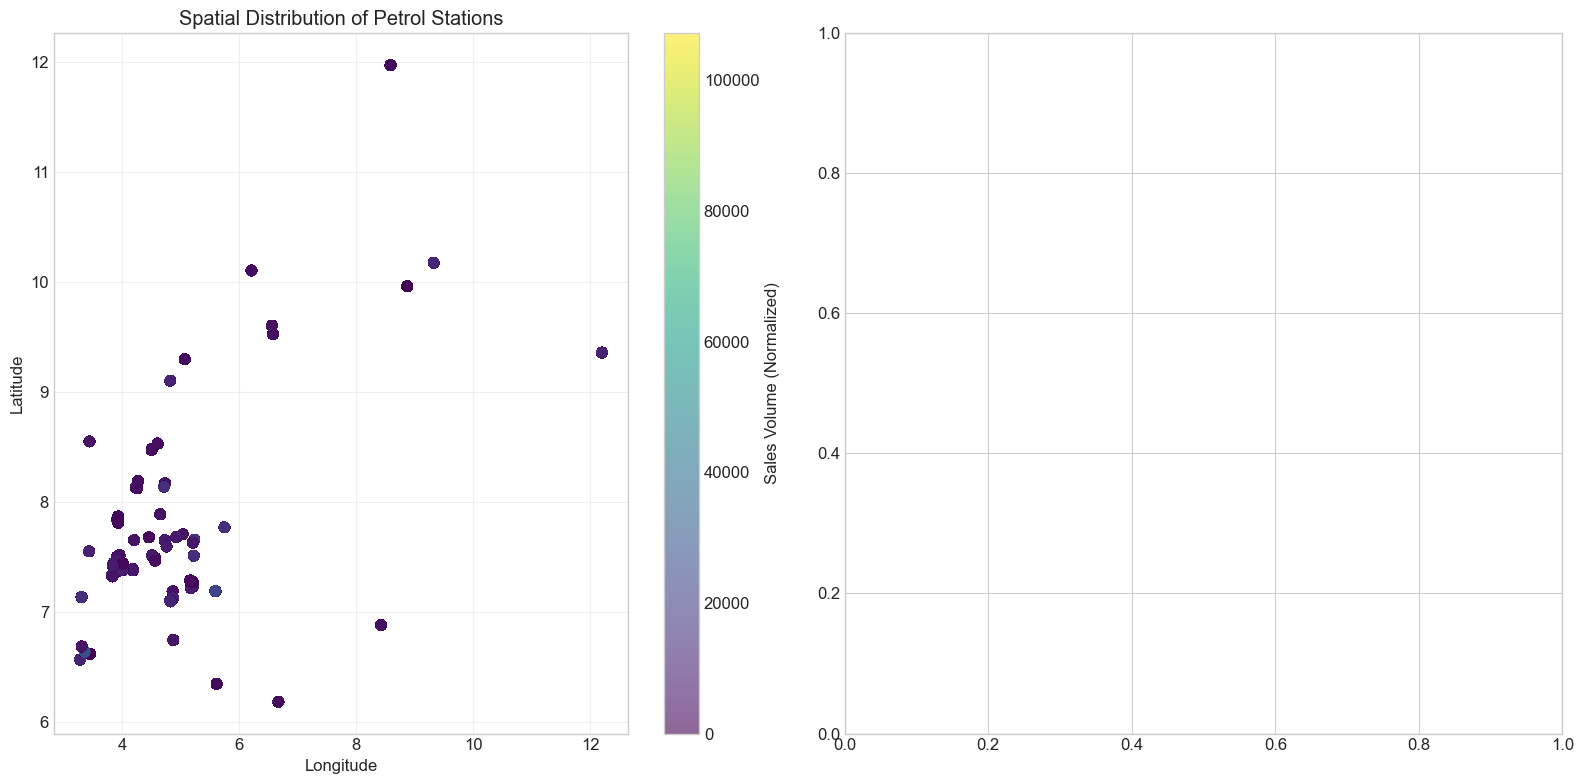

   ✓ Saved as 'figure_4_1_spatial_distribution.png'

3. Generating Figures 4.2 & 4.3: Sales Distribution...


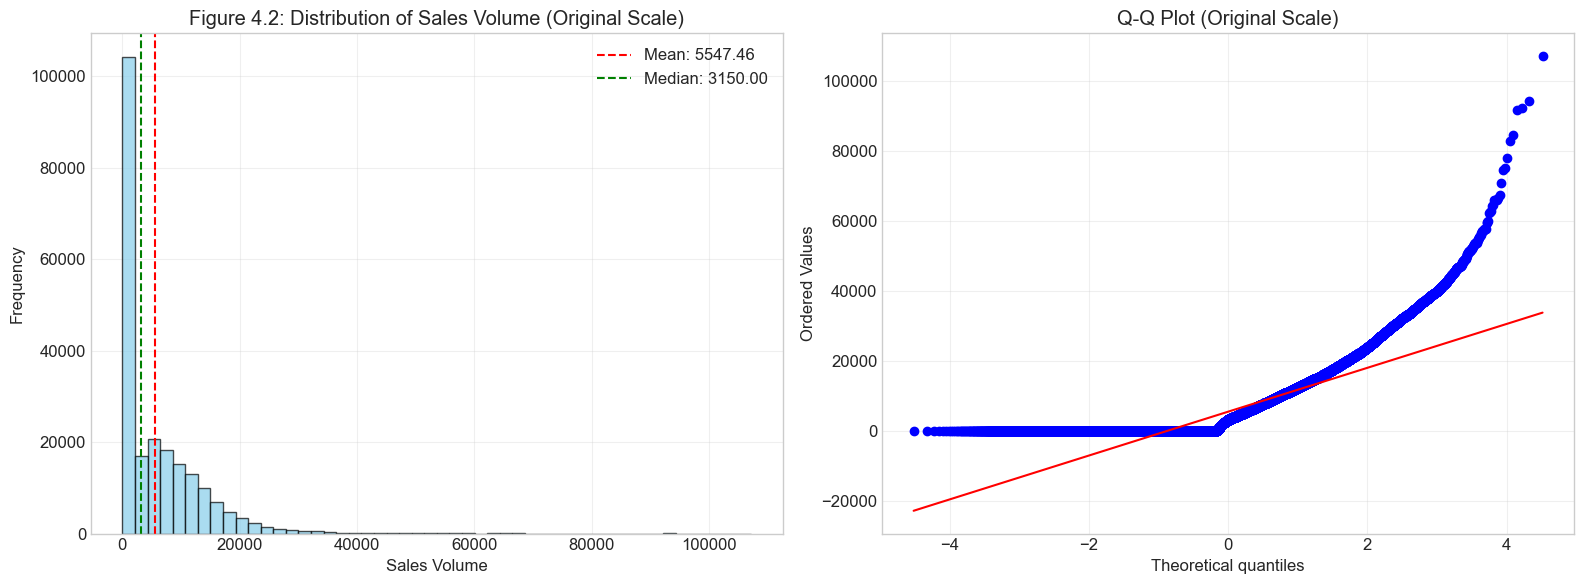

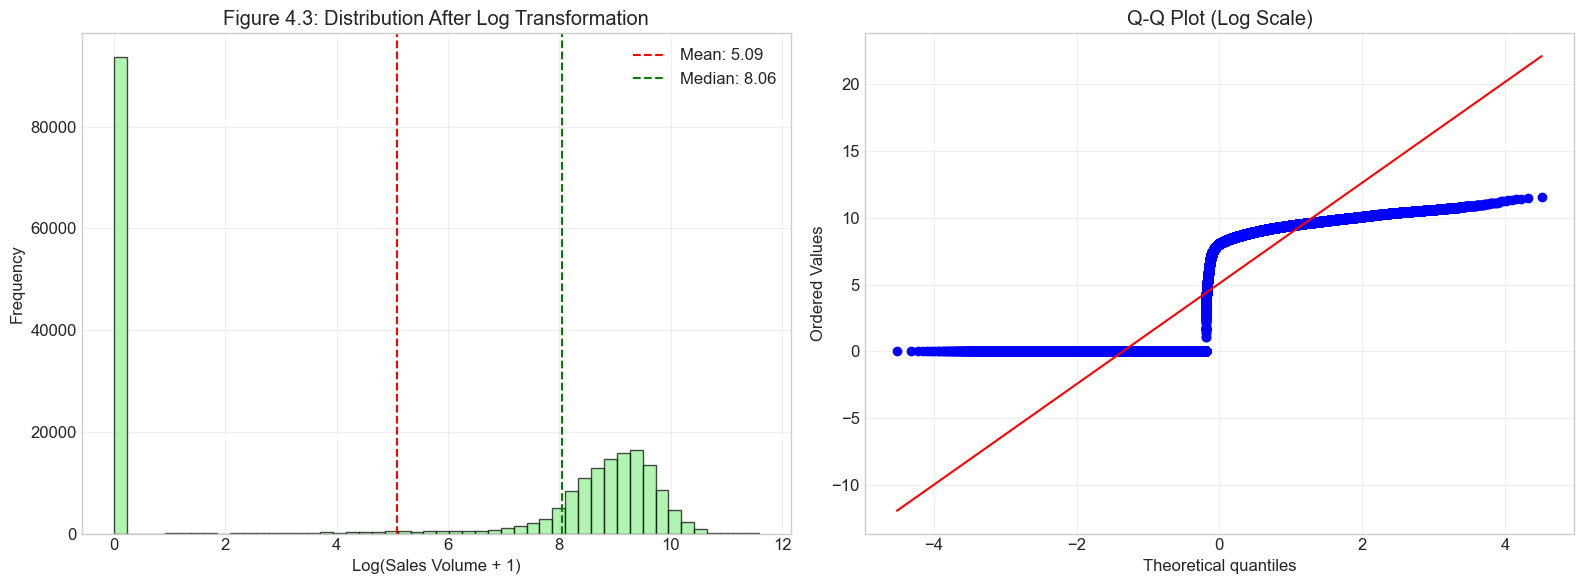

   ✓ Saved as 'figure_4_2_sales_original.png'
   ✓ Saved as 'figure_4_3_sales_log.png'

4. Generating Figure 4.4: Correlation Heatmap...


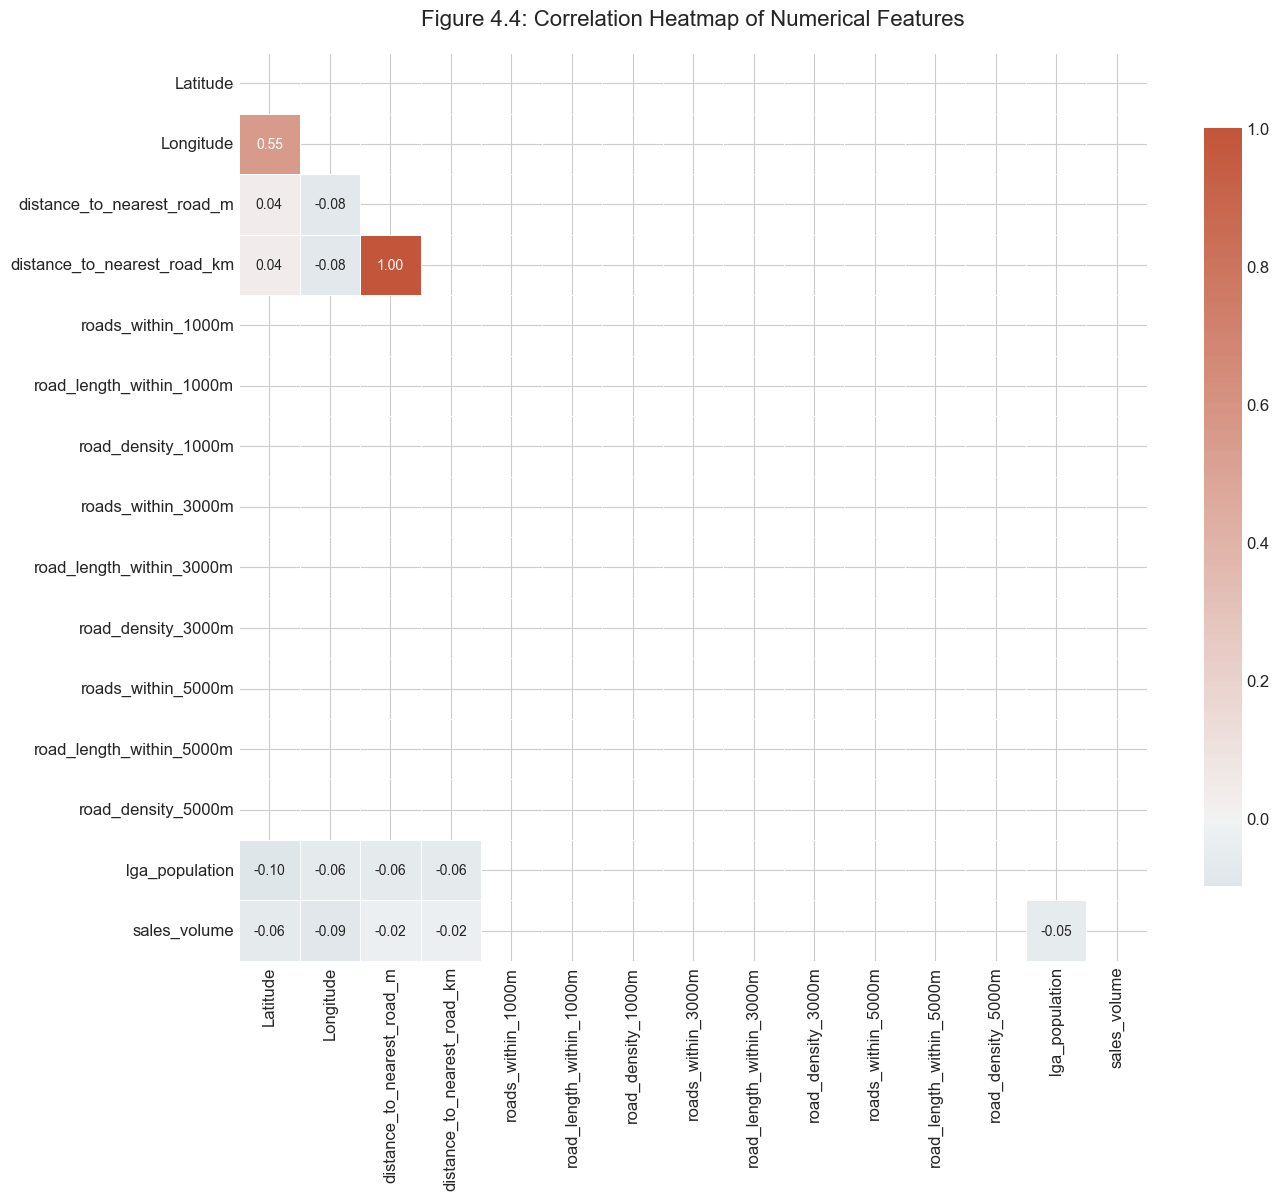

   ✓ Saved as 'figure_4_4_correlation_heatmap.png'

5. Generating Figures 4.5 & 4.6: Baseline Models...


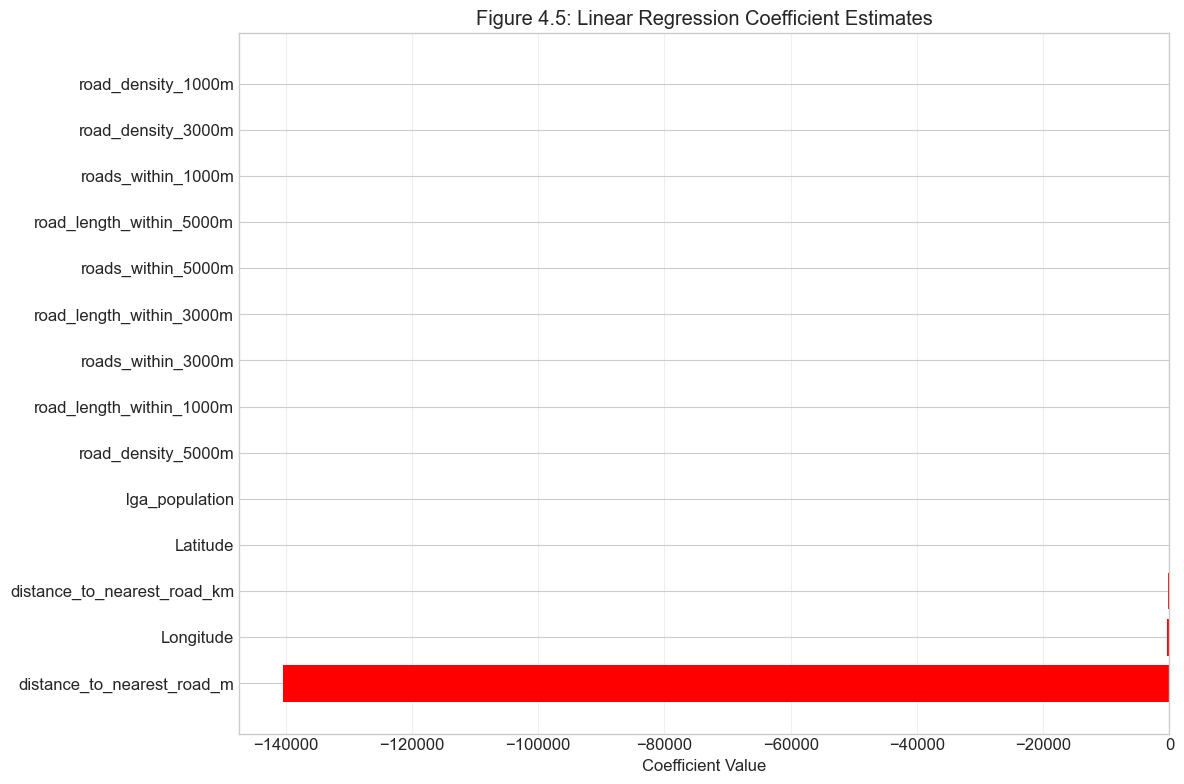

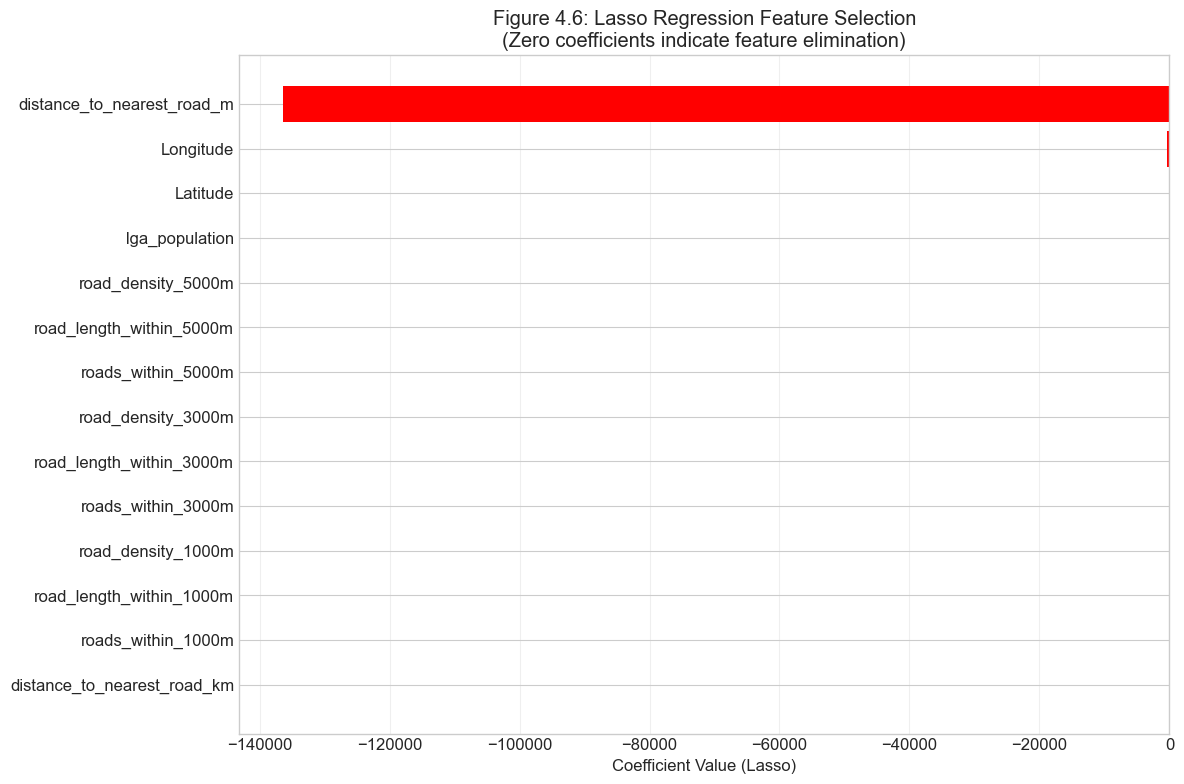

   ✓ Saved as 'figure_4_5_lr_coefficients.png'
   ✓ Saved as 'figure_4_6_lasso_features.png'

6. Generating Figures 4.7 & 4.8: Tree-Based Models...


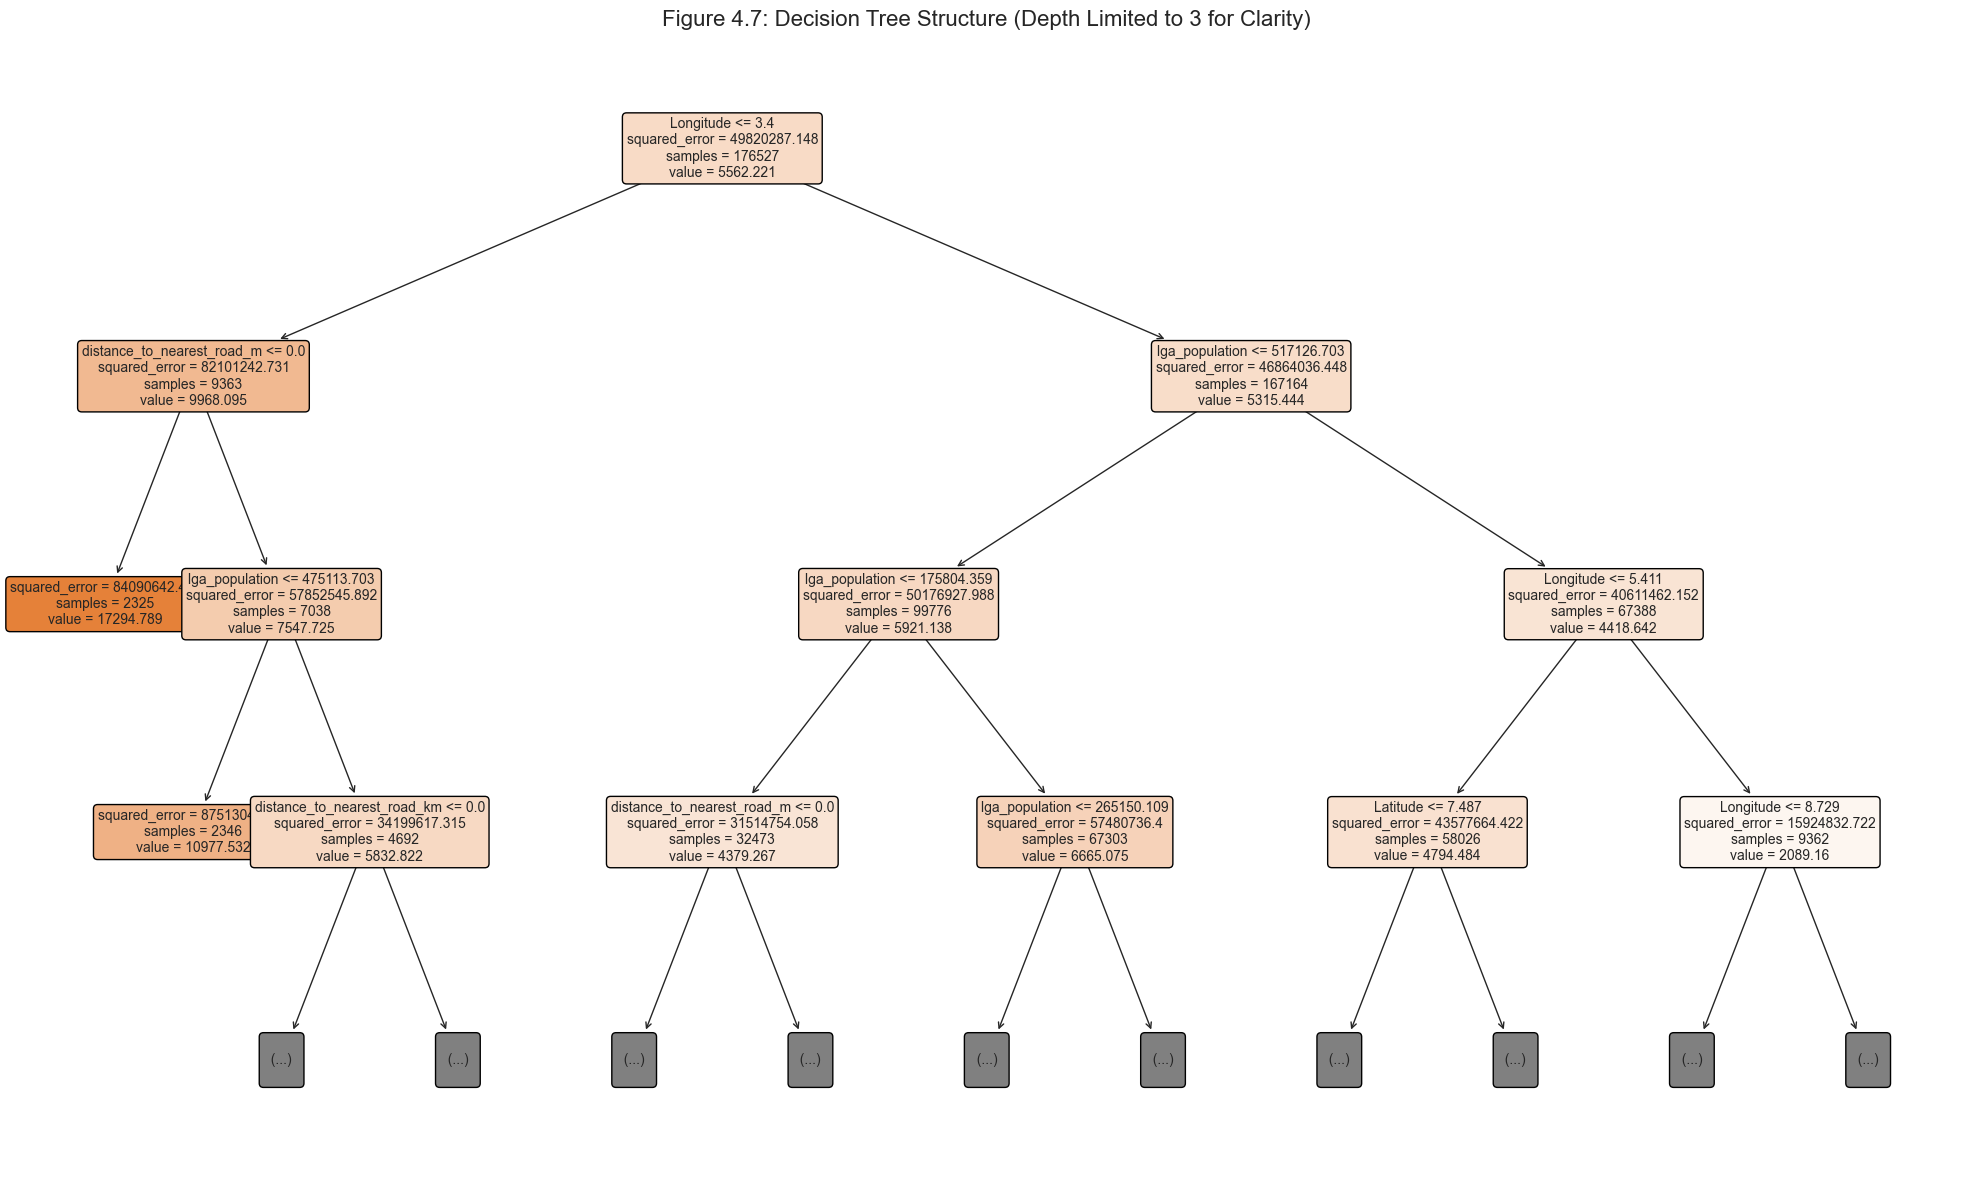

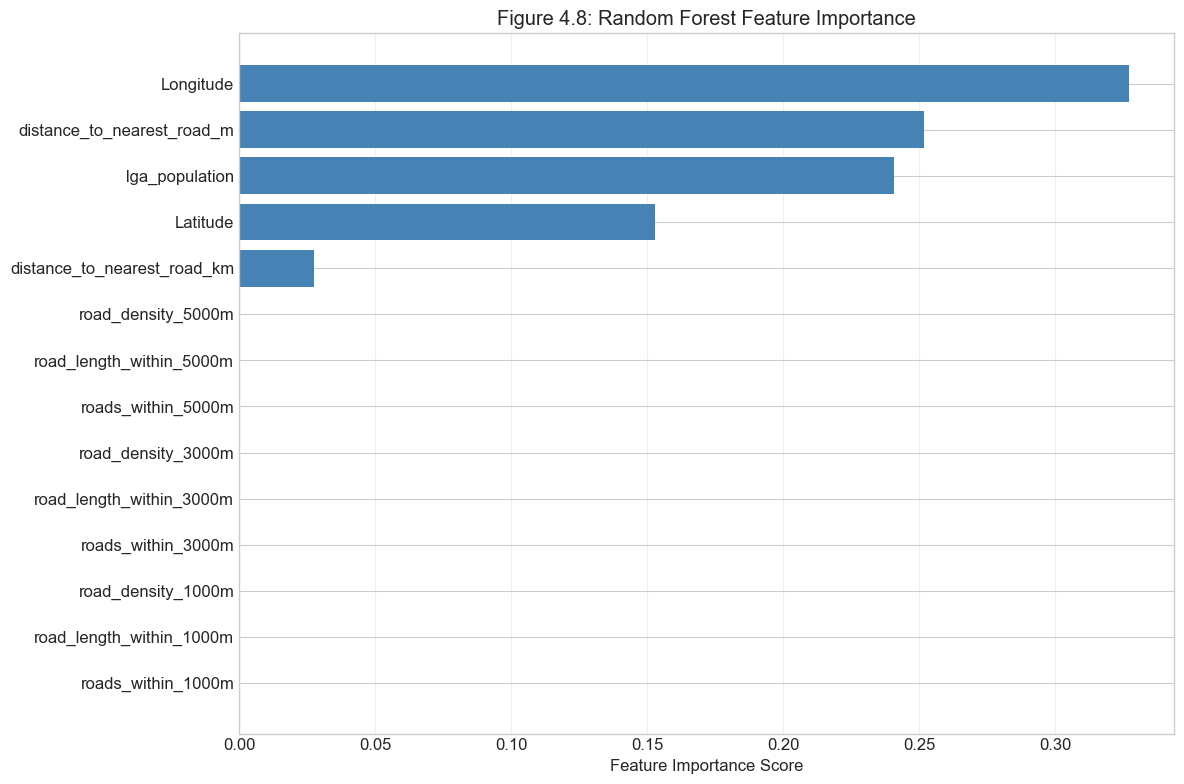

   ✓ Saved as 'figure_4_7_decision_tree.png'
   ✓ Saved as 'figure_4_8_rf_importance.png'

7. Generating Figure 4.9: Gradient Boosting...


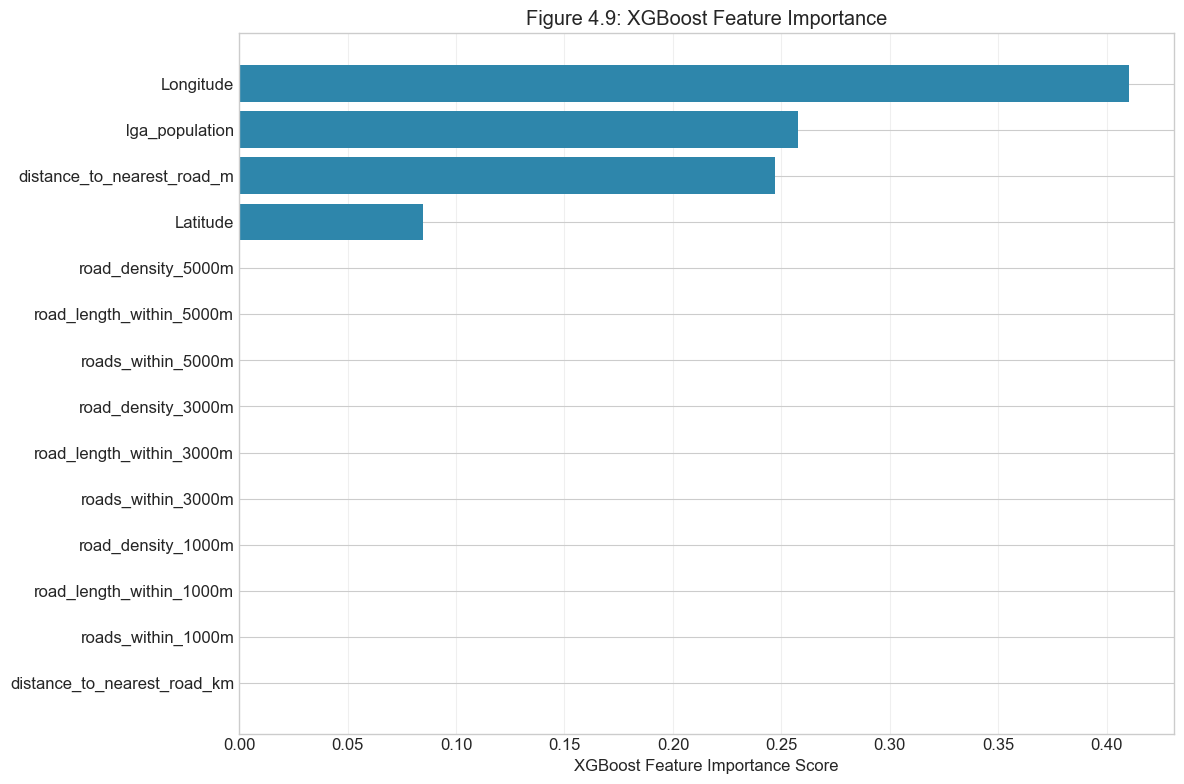

   ✓ Saved as 'figure_4_9_xgb_importance.png'

8. Generating Figure 4.10: Model Comparison...
Table 4.6: Comparative Model Performance Summary
            Model        RMSE         MAE       R²  MAPE
Linear Regression 6971.488418 5476.338818 0.013530   inf
 Lasso Regression 6971.492143 5476.247418 0.013529   inf
    Decision Tree 6639.024576 5116.818175 0.105374   NaN
    Random Forest 6175.463402 4540.970295 0.225945   NaN
          XGBoost 6175.139703 4543.554914 0.226026   NaN


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


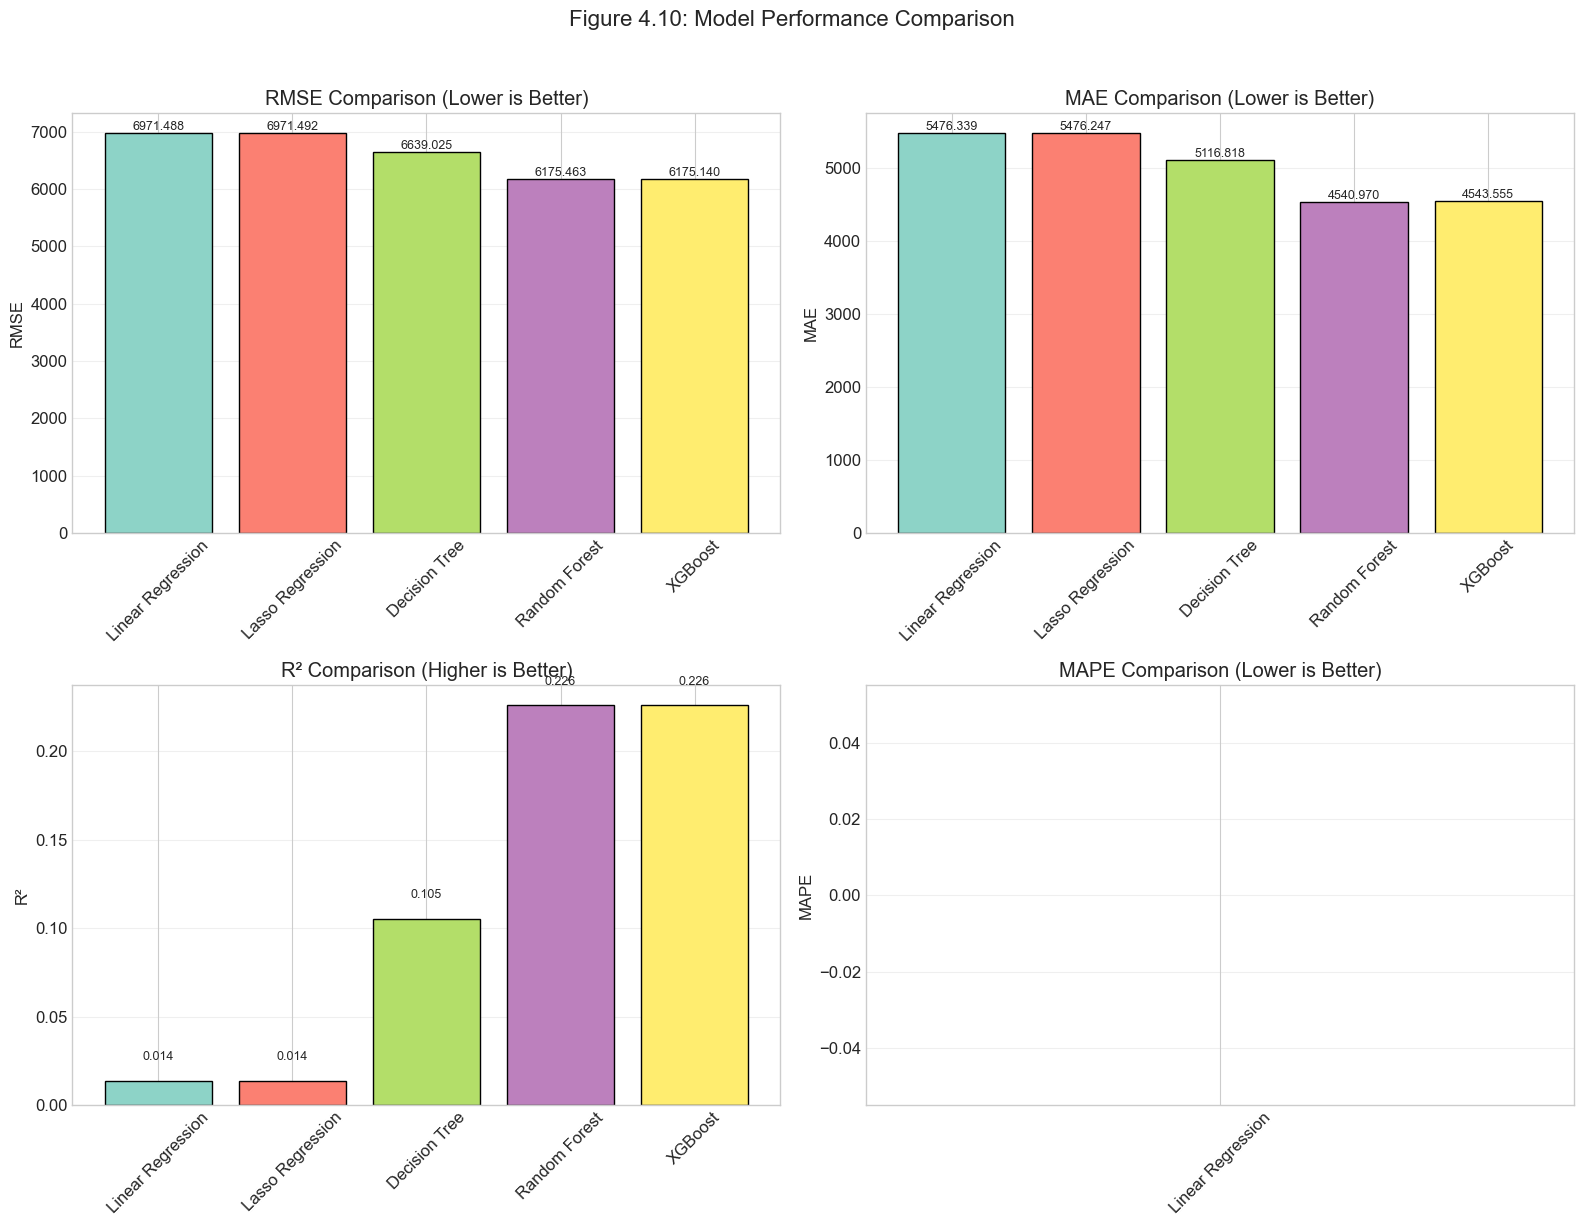

   ✓ Saved as 'figure_4_10_model_comparison.png'

9. Generating Figures 4.11 & 4.12: SHAP Analysis...


100%|===================| 44051/44132 [05:01<00:00]        

Table 4.8: Global Feature Importance Rankings (SHAP)
                    Feature  Mean|SHAP| Direction
                  Longitude 1139.878832  Positive
                   Latitude  818.710874  Positive
 distance_to_nearest_road_m  714.400755  Positive
             lga_population  647.819391  Positive
distance_to_nearest_road_km    0.000000  Negative
         roads_within_1000m    0.000000  Negative
   road_length_within_1000m    0.000000  Negative
         road_density_1000m    0.000000  Negative
         roads_within_3000m    0.000000  Negative
   road_length_within_3000m    0.000000  Negative
         road_density_3000m    0.000000  Negative
         roads_within_5000m    0.000000  Negative
   road_length_within_5000m    0.000000  Negative
         road_density_5000m    0.000000  Negative


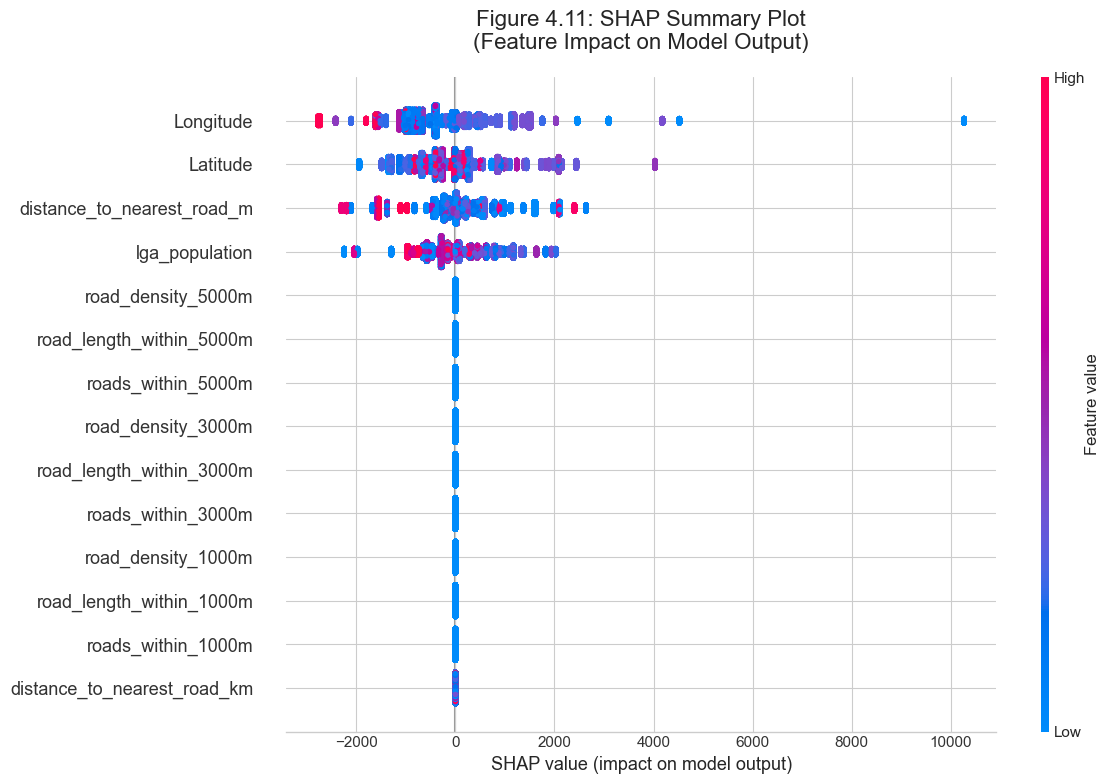

<Figure size 1000x600 with 0 Axes>

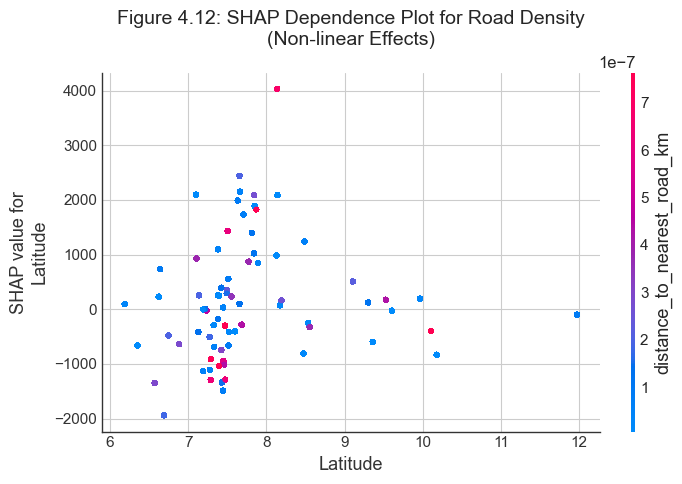

   ✓ Saved as 'figure_4_11_shap_summary.png'
   ✓ Saved as 'figure_4_12_shap_dependence.png'

10. Generating Figures 4.13 & 4.14: LIME Explanations...


<Figure size 1000x600 with 0 Axes>

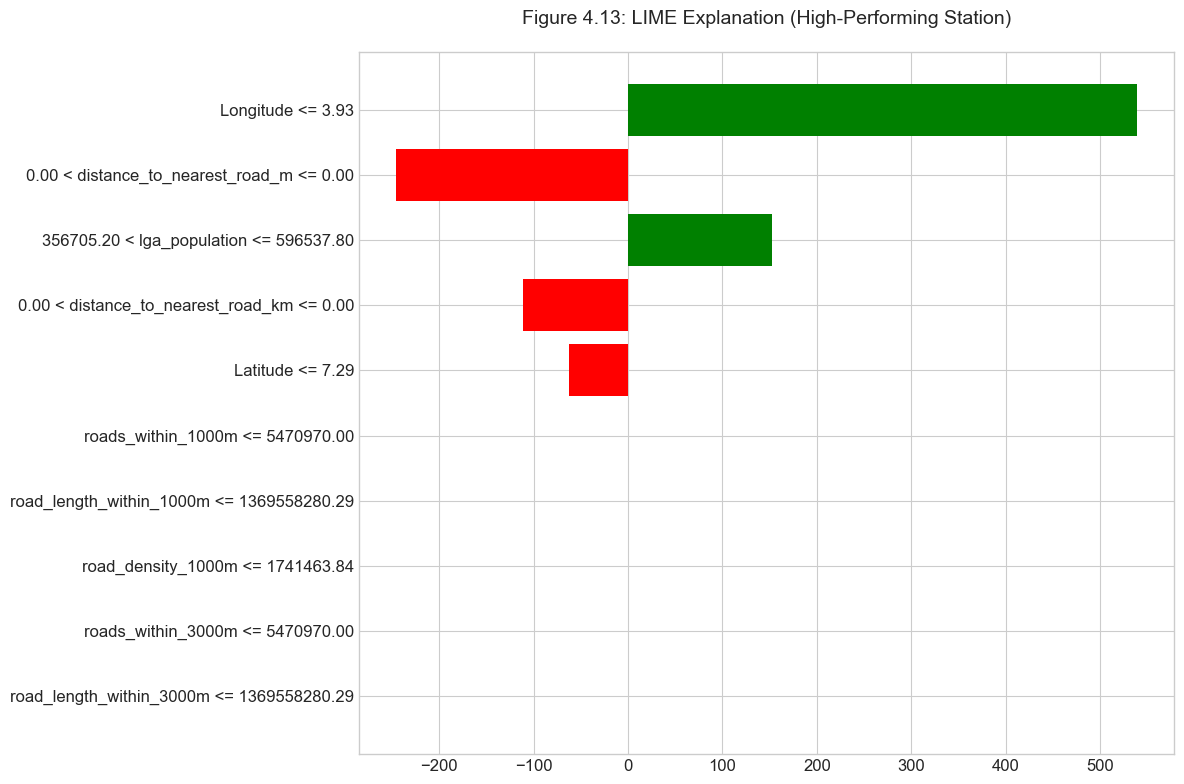

<Figure size 1000x600 with 0 Axes>

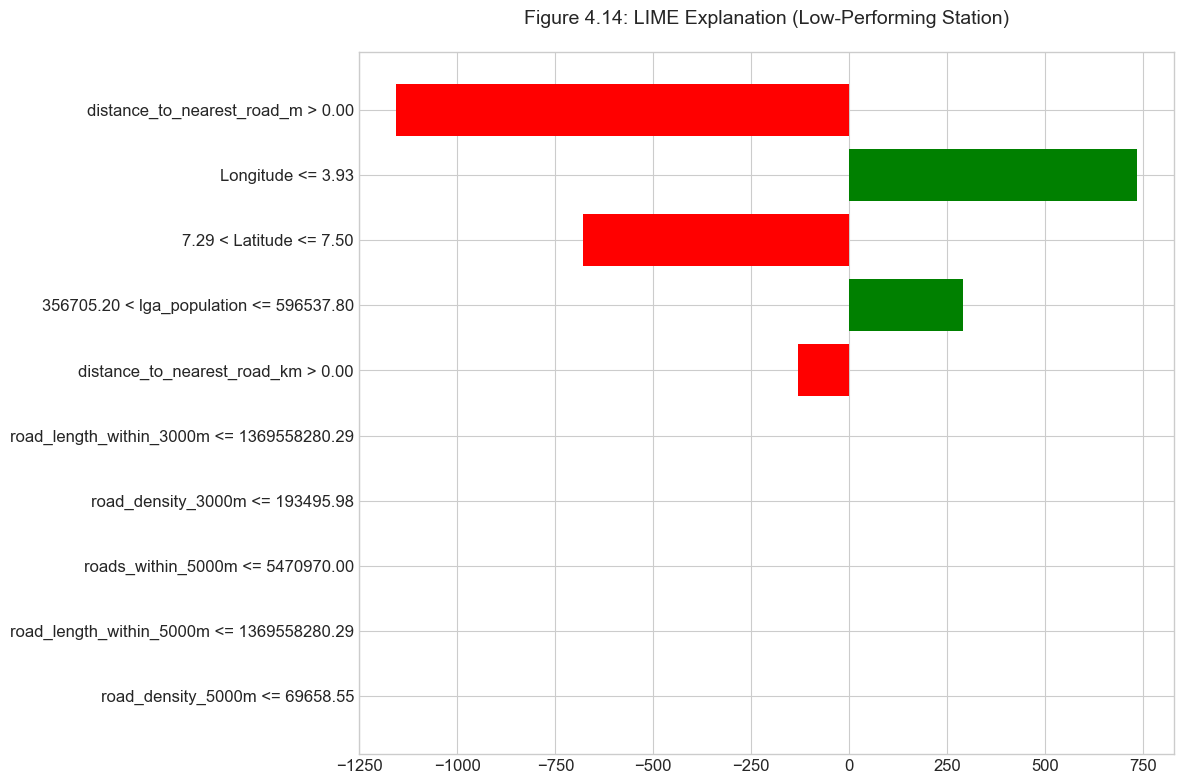

Table 4.9: Sample Local Explanations (LIME)
           Station Type  Actual Value  Predicted Value       Error Top Positive Feature                      Top Negative Feature
High-Performing Station       19374.0     17263.265625 2110.734375    Longitude <= 3.93          roads_within_3000m <= 5470970.00
 Low-Performing Station           0.0       438.951904  438.951904    Longitude <= 3.93 road_length_within_5000m <= 1369558280.29
   ✓ Saved LIME explanation figures

11. Generating Figure 4.15: Partial Dependence Plot...


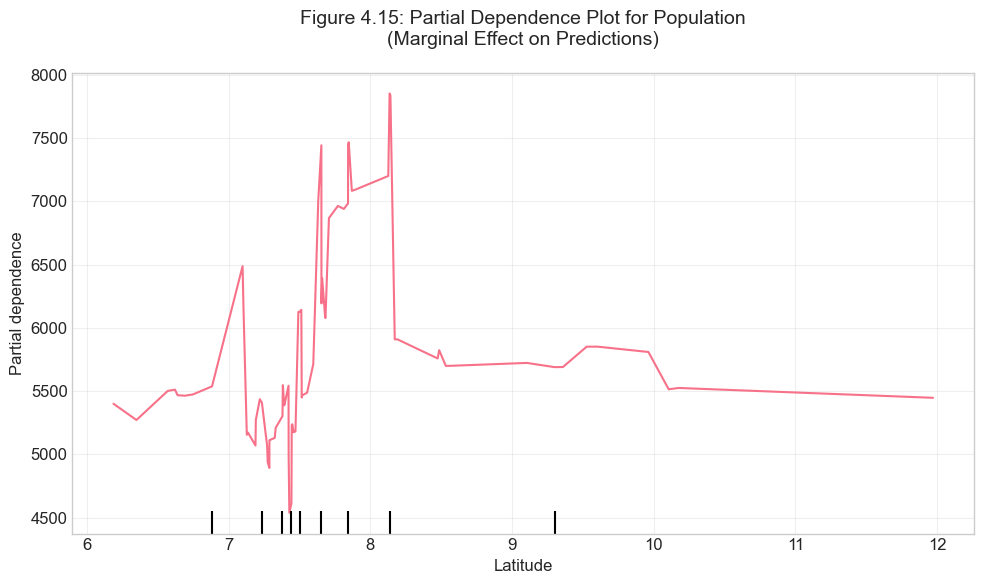

   ✓ Saved as 'figure_4_15_pdp.png'

12. Generating Figure 4.16: Residual Analysis...


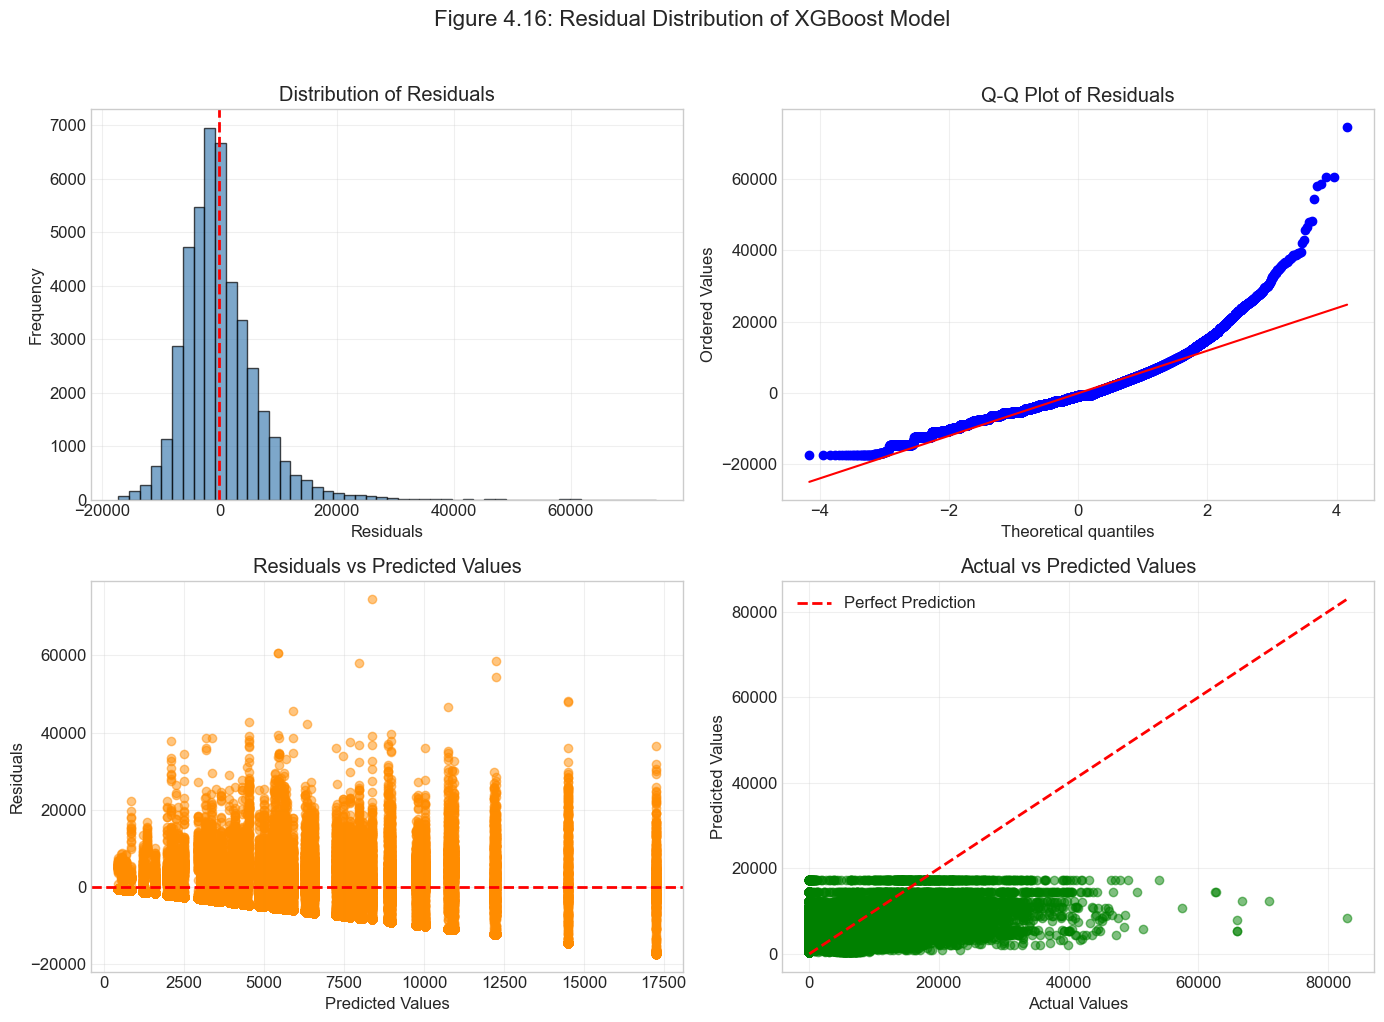

   ✓ Saved as 'figure_4_16_residual_analysis.png'

ALL FIGURES GENERATED SUCCESSFULLY!


In [7]:
# ============================================ 
# CHAPTER 4: RESULTS VISUALIZATION CODE 
# ============================================ 
 
import pandas as pd 
import numpy as np 
import geopandas as gdf
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Lasso 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
import xgboost as xgb 
import shap 
import lime 
import lime.lime_tabular 
import warnings 
warnings.filterwarnings('ignore') 
 
# Set style for all plots 
plt.style.use('seaborn-v0_8-whitegrid') 
sns.set_palette("husl") 
plt.rcParams['figure.figsize'] = (12, 8) 
plt.rcParams['font.size'] = 12 
 
# Assuming you have your data loaded as 'df' 
# Replace this with your actual data loading 
# df = pd.read_csv('your_data.csv') 
 
# ============================================ 
# 4.2.1: DESCRIPTIVE STATISTICS TABLE 
# ============================================ 
 
def create_descriptive_table(df, numerical_cols): 
    """Create Table 4.1: Descriptive Statistics""" 
    stats = df[numerical_cols].describe().T 
    stats['skewness'] = df[numerical_cols].skew() 
    stats['kurtosis'] = df[numerical_cols].kurtosis() 
    stats['missing'] = df[numerical_cols].isnull().sum() 
    stats['missing_pct'] = (stats['missing'] / len(df) * 100).round(2) 
     
    # Format for LaTeX/Excel 
    formatted_stats = stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',  
                            'skewness', 'kurtosis', 'missing_pct']] 
    formatted_stats.columns = ['N', 'Mean', 'Std Dev', 'Min', 'Q1', 'Median', 'Q3', 'Max', 
                              'Skewness', 'Kurtosis', 'Missing %'] 
     
    return formatted_stats.round(3) 
 
# ============================================ 
# 4.2.2: SPATIAL DISTRIBUTION 
# ============================================ 
 
def plot_spatial_distribution(df, lat_col='Latitude', lon_col='Longitude', state_col='state'): 
    """Create Figure 4.1: Spatial Distribution of Petrol Stations""" 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8)) 
     
    # Scatter plot 
    scatter = ax1.scatter(df[lon_col], df[lat_col],  
                         c=df.get('sales_volume', 0.5),  
                         cmap='viridis', alpha=0.6, s=50) 
    ax1.set_xlabel('Longitude') 
    ax1.set_ylabel('Latitude') 
    ax1.set_title('Spatial Distribution of Petrol Stations') 
    plt.colorbar(scatter, ax=ax1, label='Sales Volume (Normalized)') 
    ax1.grid(True, alpha=0.3) 
     
    # State-wise count 
    if state_col in df.columns: 
        state_counts = df[state_col].value_counts().head(15) 
        ax2.barh(range(len(state_counts)), state_counts.values) 
        ax2.set_yticks(range(len(state_counts))) 
        ax2.set_yticklabels(state_counts.index) 
        ax2.set_xlabel('Number of Stations') 
        ax2.set_title('Top 15 States by Station Count') 
        ax2.invert_yaxis() 
     
    plt.tight_layout() 
    plt.savefig('figure_4_1_spatial_distribution.png', dpi=300, bbox_inches='tight') 
    plt.show() 
 
# ============================================ 
# 4.2.3: DISTRIBUTION OF SALES VOLUME 
# ============================================ 
 
def plot_sales_distribution(df, sales_col='sales_volume'): 
    """Create Figures 4.2 & 4.3: Sales Distribution Before/After Log Transform""" 
     
    # Figure 4.2: Original distribution 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6)) 
     
    # Original scale 
    ax1.hist(df[sales_col], bins=50, alpha=0.7, color='skyblue', edgecolor='black') 
    ax1.axvline(df[sales_col].mean(), color='red', linestyle='--',  
                label=f'Mean: {df[sales_col].mean():.2f}') 
    ax1.axvline(df[sales_col].median(), color='green', linestyle='--',  
                label=f'Median: {df[sales_col].median():.2f}') 
    ax1.set_xlabel('Sales Volume') 
    ax1.set_ylabel('Frequency') 
    ax1.set_title('Figure 4.2: Distribution of Sales Volume (Original Scale)') 
    ax1.legend() 
    ax1.grid(True, alpha=0.3) 
     
    # Q-Q plot for original 
    from scipy import stats 
    stats.probplot(df[sales_col], dist="norm", plot=ax2) 
    ax2.set_title('Q-Q Plot (Original Scale)') 
    ax2.grid(True, alpha=0.3) 
     
    plt.tight_layout() 
    plt.savefig('figure_4_2_sales_original.png', dpi=300, bbox_inches='tight') 
    plt.show() 
     
    # Figure 4.3: After log transformation 
    df['log_sales'] = np.log1p(df[sales_col]) 
     
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6)) 
     
    # Log scale 
    ax1.hist(df['log_sales'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black') 
    ax1.axvline(df['log_sales'].mean(), color='red', linestyle='--',  
                label=f'Mean: {df["log_sales"].mean():.2f}') 
    ax1.axvline(df['log_sales'].median(), color='green', linestyle='--',  
                label=f'Median: {df["log_sales"].median():.2f}') 
    ax1.set_xlabel('Log(Sales Volume + 1)') 
    ax1.set_ylabel('Frequency') 
    ax1.set_title('Figure 4.3: Distribution After Log Transformation') 
    ax1.legend() 
    ax1.grid(True, alpha=0.3) 
     
    # Q-Q plot for log 
    stats.probplot(df['log_sales'], dist="norm", plot=ax2) 
    ax2.set_title('Q-Q Plot (Log Scale)') 
    ax2.grid(True, alpha=0.3) 
     
    plt.tight_layout() 
    plt.savefig('figure_4_3_sales_log.png', dpi=300, bbox_inches='tight') 
    plt.show() 
     
    return df 
 
# ============================================ 
# 4.2.4: CORRELATION HEATMAP 
# ============================================ 
 
def plot_correlation_heatmap(df, numerical_cols): 
    """Create Figure 4.4: Correlation Heatmap""" 
    corr_matrix = df[numerical_cols].corr() 
     
    plt.figure(figsize=(14, 12)) 
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 
    cmap = sns.diverging_palette(230, 20, as_cmap=True) 
     
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, 
                square=True, linewidths=.5, annot=True, fmt='.2f', 
                cbar_kws={"shrink": .8}, annot_kws={"size": 10}) 
     
    plt.title('Figure 4.4: Correlation Heatmap of Numerical Features', fontsize=16, pad=20) 
    plt.tight_layout() 
    plt.savefig('figure_4_4_correlation_heatmap.png', dpi=300, bbox_inches='tight') 
    plt.show() 
     
    return corr_matrix 
 
# ============================================ 
# 4.3.1: BASELINE MODEL RESULTS 
# ============================================ 
 
def train_baseline_models(X_train, X_test, y_train, y_test, feature_names): 
    """Train linear models and create visualizations""" 
     
    # Linear Regression 
    lr = LinearRegression() 
    lr.fit(X_train, y_train) 
    y_pred_lr = lr.predict(X_test) 
     
    # Lasso Regression 
    lasso = Lasso(alpha=0.01, random_state=42) 
    lasso.fit(X_train, y_train) 
    y_pred_lasso = lasso.predict(X_test) 
     
    # Create performance table (Table 4.3) 
    def calculate_metrics(y_true, y_pred, model_name): 
        return { 
            'Model': model_name, 
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)), 
            'MAE': mean_absolute_error(y_true, y_pred), 
            'R²': r2_score(y_true, y_pred), 
            'MAPE': np.mean(np.abs((y_true - y_pred) / y_true)) * 100 
        } 
     
    metrics_df = pd.DataFrame([ 
        calculate_metrics(y_test, y_pred_lr, 'Linear Regression'), 
        calculate_metrics(y_test, y_pred_lasso, 'Lasso Regression') 
    ]) 
     
    # Figure 4.5: Linear Regression Coefficients 
    plt.figure(figsize=(12, 8)) 
    coef_df = pd.DataFrame({ 
        'Feature': feature_names, 
        'Coefficient': lr.coef_ 
    }).sort_values('Coefficient', ascending=True) 
     
    colors = ['red' if x < 0 else 'green' for x in coef_df['Coefficient']] 
    plt.barh(range(len(coef_df)), coef_df['Coefficient'], color=colors) 
    plt.yticks(range(len(coef_df)), coef_df['Feature']) 
    plt.xlabel('Coefficient Value') 
    plt.title('Figure 4.5: Linear Regression Coefficient Estimates') 
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5) 
    plt.grid(True, alpha=0.3, axis='x') 
    plt.tight_layout() 
    plt.savefig('figure_4_5_lr_coefficients.png', dpi=300, bbox_inches='tight') 
    plt.show() 
     
    # Figure 4.6: Lasso Feature Selection 
    plt.figure(figsize=(12, 8)) 
    lasso_coef_df = pd.DataFrame({ 
        'Feature': feature_names, 
        'Coefficient': lasso.coef_, 
        'Absolute': np.abs(lasso.coef_) 
    }).sort_values('Absolute', ascending=True) 
     
    colors = ['red' if x < 0 else 'green' for x in lasso_coef_df['Coefficient']] 
    plt.barh(range(len(lasso_coef_df)), lasso_coef_df['Coefficient'], color=colors) 
    plt.yticks(range(len(lasso_coef_df)), lasso_coef_df['Feature']) 
    plt.xlabel('Coefficient Value (Lasso)') 
    plt.title('Figure 4.6: Lasso Regression Feature Selection\n(Zero coefficients indicate feature elimination)') 
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5) 
    plt.grid(True, alpha=0.3, axis='x') 
    plt.tight_layout() 
    plt.savefig('figure_4_6_lasso_features.png', dpi=300, bbox_inches='tight') 
    plt.show() 
     
    return metrics_df, lr, lasso 
 
# ============================================ 
# 4.3.2: TREE-BASED MODEL RESULTS 
# ============================================ 
 
def train_tree_models(X_train, X_test, y_train, y_test, feature_names): 
    """Train tree models and create visualizations""" 
     
    # Decision Tree 
    dt = DecisionTreeRegressor(max_depth=4, random_state=42) 
    dt.fit(X_train, y_train) 
    y_pred_dt = dt.predict(X_test) 
     
    # Random Forest 
    rf = RandomForestRegressor(n_estimators=100, random_state=42) 
    rf.fit(X_train, y_train) 
    y_pred_rf = rf.predict(X_test) 
     
    # Performance table (Table 4.4) 
    def calculate_metrics(y_true, y_pred, model_name): 
        return { 
            'Model': model_name, 
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)), 
            'MAE': mean_absolute_error(y_true, y_pred), 
            'R²': r2_score(y_true, y_pred) 
        } 
     
    metrics_df = pd.DataFrame([ 
        calculate_metrics(y_test, y_pred_dt, 'Decision Tree'), 
        calculate_metrics(y_test, y_pred_rf, 'Random Forest') 
    ]) 
     
    # Figure 4.7: Decision Tree Structure 
    from sklearn.tree import plot_tree 
    plt.figure(figsize=(20, 12)) 
    plot_tree(dt, feature_names=feature_names,  
              filled=True, rounded=True, fontsize=10, max_depth=3) 
    plt.title('Figure 4.7: Decision Tree Structure (Depth Limited to 3 for Clarity)', fontsize=16) 
    plt.tight_layout() 
    plt.savefig('figure_4_7_decision_tree.png', dpi=300, bbox_inches='tight') 
    plt.show() 
     
    # Figure 4.8: Random Forest Feature Importance 
    plt.figure(figsize=(12, 8)) 
    importance_df = pd.DataFrame({ 
        'Feature': feature_names, 
        'Importance': rf.feature_importances_ 
    }).sort_values('Importance', ascending=True) 
     
    plt.barh(range(len(importance_df)), importance_df['Importance'], color='steelblue') 
    plt.yticks(range(len(importance_df)), importance_df['Feature']) 
    plt.xlabel('Feature Importance Score') 
    plt.title('Figure 4.8: Random Forest Feature Importance') 
    plt.grid(True, alpha=0.3, axis='x') 
    plt.tight_layout() 
    plt.savefig('figure_4_8_rf_importance.png', dpi=300, bbox_inches='tight') 
    plt.show() 
     
    return metrics_df, dt, rf, importance_df 
 
# ============================================ 
# 4.3.3: GRADIENT BOOSTING RESULTS 
# ============================================ 
 
def train_gradient_boosting(X_train, X_test, y_train, y_test, feature_names): 
    """Train XGBoost and create visualizations""" 
     
    # XGBoost 
    xg_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42) 
    xg_reg.fit(X_train, y_train) 
    y_pred_xgb = xg_reg.predict(X_test) 
     
    # Performance table (Table 4.5) 
    metrics = { 
        'Model': 'XGBoost', 
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb)), 
        'MAE': mean_absolute_error(y_test, y_pred_xgb), 
        'R²': r2_score(y_test, y_pred_xgb) 
    } 
    metrics_df = pd.DataFrame([metrics]) 
     
    # Figure 4.9: XGBoost Feature Importance 
    plt.figure(figsize=(12, 8)) 
     
    # Get feature importance 
    importance_scores = xg_reg.feature_importances_ 
    importance_df = pd.DataFrame({ 
        'Feature': feature_names, 
        'Importance': importance_scores 
    }).sort_values('Importance', ascending=True) 
     
    # Plot 
    plt.barh(range(len(importance_df)), importance_df['Importance'],  
             color=['#2E86AB' if x > np.median(importance_scores) else '#A23B72'  
                    for x in importance_df['Importance']]) 
    plt.yticks(range(len(importance_df)), importance_df['Feature']) 
    plt.xlabel('XGBoost Feature Importance Score') 
    plt.title('Figure 4.9: XGBoost Feature Importance') 
    plt.grid(True, alpha=0.3, axis='x') 
    plt.tight_layout() 
    plt.savefig('figure_4_9_xgb_importance.png', dpi=300, bbox_inches='tight') 
    plt.show() 
     
    return metrics_df, xg_reg, importance_df 
 
# ============================================ 
# 4.3.4: COMPARATIVE MODEL EVALUATION 
# ============================================ 
 
def create_comparative_evaluation(all_metrics): 
    """Create Table 4.6 and Figure 4.10: Model Comparison""" 
     
    # Combine all metrics 
    combined_metrics = pd.concat(all_metrics, ignore_index=True) 
     
    # Save as Table 4.6 
    print("Table 4.6: Comparative Model Performance Summary") 
    print(combined_metrics.to_string(index=False)) 
     
    # Figure 4.10: Model Performance Comparison 
    fig, axes = plt.subplots(2, 2, figsize=(16, 12)) 
     
    metrics_to_plot = ['RMSE', 'MAE', 'R²', 'MAPE'] 
    colors = plt.cm.Set3(np.linspace(0, 1, len(combined_metrics)))  # pyright: ignore[reportAttributeAccessIssue]
     
    for idx, metric in enumerate(metrics_to_plot[:4]): 
        ax = axes[idx//2, idx%2] 
         
        if metric in combined_metrics.columns: 
            # For error metrics, lower is better 
            if metric in ['RMSE', 'MAE', 'MAPE']: 
                bars = ax.bar(combined_metrics['Model'], combined_metrics[metric],  
                             color=colors, edgecolor='black') 
                ax.set_ylabel(metric) 
                ax.set_title(f'{metric} Comparison (Lower is Better)') 
            else:  # For R², higher is better 
                bars = ax.bar(combined_metrics['Model'], combined_metrics[metric],  
                             color=colors, edgecolor='black') 
                ax.set_ylabel(metric) 
                ax.set_title(f'{metric} Comparison (Higher is Better)') 
             
            # Add value labels 
            for bar in bars: 
                height = bar.get_height() 
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01, 
                       f'{height:.3f}', ha='center', va='bottom', fontsize=9) 
             
            ax.tick_params(axis='x', rotation=45) 
            ax.grid(True, alpha=0.3, axis='y') 
     
    plt.suptitle('Figure 4.10: Model Performance Comparison', fontsize=16, y=1.02) 
    plt.tight_layout() 
    plt.savefig('figure_4_10_model_comparison.png', dpi=300, bbox_inches='tight') 
    plt.show() 
     
    return combined_metrics 
 
# ============================================ 
# 4.4.1: SHAP ANALYSIS 
# ============================================ 
 
def create_shap_analysis(model, X_train, X_test, feature_names): 
    """Create SHAP visualizations""" 
     
    # Initialize SHAP explainer 
    explainer = shap.Explainer(model, X_train) 
    shap_values = explainer(X_test) 
     
    # Table 4.8: Global Feature Importance Rankings 
    shap_importance = pd.DataFrame({ 
        'Feature': feature_names, 
        'Mean|SHAP|': np.abs(shap_values.values).mean(axis=0), 
        'Direction': ['Positive' if shap_values.values[:, i].mean() > 0  
                     else 'Negative' for i in range(len(feature_names))] 
    }).sort_values('Mean|SHAP|', ascending=False) 
     
    print("Table 4.8: Global Feature Importance Rankings (SHAP)") 
    print(shap_importance.to_string(index=False)) 
     
    # Figure 4.11: SHAP Summary Plot 
    plt.figure(figsize=(12, 8)) 
    shap.summary_plot(shap_values, X_test, feature_names=feature_names,  
                     show=False, plot_size=None) 
    plt.title('Figure 4.11: SHAP Summary Plot\n(Feature Impact on Model Output)',  
             fontsize=16, pad=20) 
    plt.tight_layout() 
    plt.savefig('figure_4_11_shap_summary.png', dpi=300, bbox_inches='tight') 
    plt.show() 
     
    # Figure 4.12: SHAP Dependence Plot for Road Density (example) 
    # Replace 'road_density' with your actual feature name 
    road_density_idx = list(feature_names).index('road_density') if 'road_density' in feature_names else 0 
     
    plt.figure(figsize=(10, 6)) 
    shap.dependence_plot(road_density_idx, shap_values.values, X_test, 
                        feature_names=feature_names, show=False) 
    plt.title('Figure 4.12: SHAP Dependence Plot for Road Density\n(Non-linear Effects)',  
             fontsize=14, pad=20) 
    plt.tight_layout() 
    plt.savefig('figure_4_12_shap_dependence.png', dpi=300, bbox_inches='tight') 
    plt.show() 
     
    return shap_importance, shap_values 
 
# ============================================ 
# 4.4.2: LIME EXPLANATIONS 
# ============================================ 
 
def create_lime_explanations(model, X_train, X_test, feature_names, y_test, y_pred): 
    """Create LIME explanations for specific instances""" 
     
    # Initialize LIME explainer 
    explainer = lime.lime_tabular.LimeTabularExplainer( 
        X_train.values,  
        feature_names=feature_names, 
        mode='regression', 
        random_state=42 
    ) 
     
    # Select representative instances 
    high_perf_idx = np.argmax(y_pred)  # Highest prediction 
    low_perf_idx = np.argmin(y_pred)   # Lowest prediction 
     
    instances = [ 
        ('High-Performing Station', high_perf_idx), 
        ('Low-Performing Station', low_perf_idx) 
    ] 
     
    explanations = [] 
     
    for name, idx in instances: 
        # Explain prediction 
        exp = explainer.explain_instance( 
            X_test.values[idx],  
            model.predict,  
            num_features=10 
        ) 
         
        # Save explanation for table 
        explanation_dict = { 
            'Station Type': name, 
            'Actual Value': y_test.iloc[idx], 
            'Predicted Value': y_pred[idx], 
            'Error': abs(y_test.iloc[idx] - y_pred[idx]), 
            'Top Positive Feature': exp.as_list()[0][0] if exp.as_list()[0][1] > 0 else exp.as_list()[1][0], 
            'Top Negative Feature': exp.as_list()[-1][0] if exp.as_list()[-1][1] < 0 else exp.as_list()[-2][0] 
        } 
        explanations.append(explanation_dict) 
         
        # Create visualization 
        plt.figure(figsize=(10, 6)) 
        fig = exp.as_pyplot_figure() 
        plt.title(f'Figure 4.{13 if name.startswith("High") else 14}: LIME Explanation ({name})',  
                 fontsize=14, pad=20) 
        plt.tight_layout() 
        plt.savefig(f'figure_4_{13 if name.startswith("High") else 14}_lime_{name.lower().replace(" ", "_")}.png',  
                   dpi=300, bbox_inches='tight') 
        plt.show() 
     
    # Table 4.9: Sample Local Explanations 
    lime_table = pd.DataFrame(explanations) 
    print("Table 4.9: Sample Local Explanations (LIME)") 
    print(lime_table.to_string(index=False)) 
     
    return lime_table 
 
# ============================================ 
# 4.4.3: PARTIAL DEPENDENCE PLOTS 
# ============================================ 
 
def create_partial_dependence(model, X_train, feature_names, target_feature='population'): 
    """Create Figure 4.15: Partial Dependence Plot""" 
     
    from sklearn.inspection import PartialDependenceDisplay 
     
    plt.figure(figsize=(10, 6)) 
    ax = plt.gca() 
     
    PartialDependenceDisplay.from_estimator( 
        model, X_train,  
        features=[target_feature] if target_feature in feature_names else [0], 
        feature_names=feature_names, 
        ax=ax 
    ) 
     
    plt.title(f'Figure 4.15: Partial Dependence Plot for {target_feature.title()}\n(Marginal Effect on Predictions)',  
             fontsize=14, pad=20) 
    plt.grid(True, alpha=0.3) 
    plt.tight_layout() 
    plt.savefig('figure_4_15_pdp.png', dpi=300, bbox_inches='tight') 
    plt.show() 
 
# ============================================ 
# 4.5.2: ERROR ANALYSIS 
# ============================================ 
 
def plot_residual_analysis(y_test, y_pred, model_name='Final Model'): 
    """Create Figure 4.16: Residual Distribution""" 
     
    residuals = y_test - y_pred 
     
    fig, axes = plt.subplots(2, 2, figsize=(14, 10)) 
     
    # 1. Residual distribution 
    axes[0, 0].hist(residuals, bins=50, alpha=0.7, color='steelblue', edgecolor='black') 
    axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2) 
    axes[0, 0].set_xlabel('Residuals') 
    axes[0, 0].set_ylabel('Frequency') 
    axes[0, 0].set_title('Distribution of Residuals') 
    axes[0, 0].grid(True, alpha=0.3) 
     
    # 2. Q-Q plot of residuals 
    from scipy import stats 
    stats.probplot(residuals, dist="norm", plot=axes[0, 1]) 
    axes[0, 1].set_title('Q-Q Plot of Residuals') 
    axes[0, 1].grid(True, alpha=0.3) 
     
    # 3. Residuals vs Predicted 
    axes[1, 0].scatter(y_pred, residuals, alpha=0.5, color='darkorange') 
    axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2) 
    axes[1, 0].set_xlabel('Predicted Values') 
    axes[1, 0].set_ylabel('Residuals') 
    axes[1, 0].set_title('Residuals vs Predicted Values') 
    axes[1, 0].grid(True, alpha=0.3) 
     
    # 4. Actual vs Predicted 
    axes[1, 1].scatter(y_test, y_pred, alpha=0.5, color='green') 
    axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  
                   'r--', linewidth=2, label='Perfect Prediction') 
    axes[1, 1].set_xlabel('Actual Values') 
    axes[1, 1].set_ylabel('Predicted Values') 
    axes[1, 1].set_title('Actual vs Predicted Values') 
    axes[1, 1].legend() 
    axes[1, 1].grid(True, alpha=0.3) 
     
    plt.suptitle(f'Figure 4.16: Residual Distribution of {model_name}', fontsize=16, y=1.02) 
    plt.tight_layout() 
    plt.savefig('figure_4_16_residual_analysis.png', dpi=300, bbox_inches='tight') 
    plt.show() 
     
    return residuals 
 
# ============================================ 
# MAIN EXECUTION FUNCTION 
# ============================================ 
 
def generate_all_figures(df, target_col='sales_volume'): 
    """ 
    Master function to generate all figures for Chapter 4 
    """ 
     
    print("=" * 60) 
    print("GENERATING ALL FIGURES FOR CHAPTER 4") 
    print("=" * 60) 
     
    # Identify numerical columns (excluding target) 
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist() 
    if target_col in numerical_cols: 
        numerical_cols.remove(target_col) 
     
    # 4.2.1: Descriptive Statistics Table 
    print("\n1. Generating Table 4.1: Descriptive Statistics...") 
    desc_table = create_descriptive_table(df, numerical_cols + [target_col]) 
    desc_table.to_csv('table_4_1_descriptive_stats.csv') 
    print("   ✓ Saved as 'table_4_1_descriptive_stats.csv'") 
     
    # 4.2.2: Spatial Distribution 
    print("\n2. Generating Figure 4.1: Spatial Distribution...") 
    plot_spatial_distribution(df) 
    print("   ✓ Saved as 'figure_4_1_spatial_distribution.png'") 
     
    # 4.2.3: Sales Distribution 
    print("\n3. Generating Figures 4.2 & 4.3: Sales Distribution...") 
    df = plot_sales_distribution(df, target_col) 
    print("   ✓ Saved as 'figure_4_2_sales_original.png'") 
    print("   ✓ Saved as 'figure_4_3_sales_log.png'") 
     
    # 4.2.4: Correlation Heatmap 
    print("\n4. Generating Figure 4.4: Correlation Heatmap...") 
    corr_matrix = plot_correlation_heatmap(df, numerical_cols + [target_col]) 
    print("   ✓ Saved as 'figure_4_4_correlation_heatmap.png'") 
     
    # Prepare data for modeling 
    X = df[numerical_cols] 
    y = df[target_col] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
    feature_names = numerical_cols 
     
    # 4.3.1: Baseline Models 
    print("\n5. Generating Figures 4.5 & 4.6: Baseline Models...") 
    baseline_metrics, lr, lasso = train_baseline_models(X_train, X_test, y_train, y_test, feature_names) 
    print("   ✓ Saved as 'figure_4_5_lr_coefficients.png'") 
    print("   ✓ Saved as 'figure_4_6_lasso_features.png'") 
     
    # 4.3.2: Tree Models 
    print("\n6. Generating Figures 4.7 & 4.8: Tree-Based Models...") 
    tree_metrics, dt, rf, rf_importance = train_tree_models(X_train, X_test, y_train, y_test, feature_names) 
    print("   ✓ Saved as 'figure_4_7_decision_tree.png'") 
    print("   ✓ Saved as 'figure_4_8_rf_importance.png'") 
     
    # 4.3.3: Gradient Boosting 
    print("\n7. Generating Figure 4.9: Gradient Boosting...") 
    xgb_metrics, xg_reg, xgb_importance = train_gradient_boosting(X_train, X_test, y_train, y_test, feature_names) 
    print("   ✓ Saved as 'figure_4_9_xgb_importance.png'") 
     
    # 4.3.4: Comparative Evaluation 
    print("\n8. Generating Figure 4.10: Model Comparison...") 
    all_metrics = [baseline_metrics, tree_metrics, xgb_metrics] 
    combined_metrics = create_comparative_evaluation(all_metrics) 
    print("   ✓ Saved as 'figure_4_10_model_comparison.png'") 
     
    # Select best model for interpretability (using XGBoost as example) 
    best_model = xg_reg 
     
    # 4.4.1: SHAP Analysis 
    print("\n9. Generating Figures 4.11 & 4.12: SHAP Analysis...") 
    shap_importance, shap_values = create_shap_analysis(best_model, X_train, X_test, feature_names) 
    print("   ✓ Saved as 'figure_4_11_shap_summary.png'") 
    print("   ✓ Saved as 'figure_4_12_shap_dependence.png'") 
     
    # 4.4.2: LIME Explanations 
    print("\n10. Generating Figures 4.13 & 4.14: LIME Explanations...") 
    y_pred_best = best_model.predict(X_test) 
    lime_table = create_lime_explanations(best_model, X_train, X_test, feature_names, y_test, y_pred_best) 
    print("   ✓ Saved LIME explanation figures") 
     
    # 4.4.3: Partial Dependence 
    print("\n11. Generating Figure 4.15: Partial Dependence Plot...") 
    create_partial_dependence(best_model, X_train, feature_names) 
    print("   ✓ Saved as 'figure_4_15_pdp.png'") 
     
    # 4.5.2: Error Analysis 
    print("\n12. Generating Figure 4.16: Residual Analysis...") 
    residuals = plot_residual_analysis(y_test, y_pred_best, 'XGBoost Model') 
    print("   ✓ Saved as 'figure_4_16_residual_analysis.png'") 
     
    print("\n" + "=" * 60) 
    print("ALL FIGURES GENERATED SUCCESSFULLY!") 
    print("=" * 60) 
     
    # Return all models and results for potential further analysis 
    return { 
        'models': {'lr': lr, 'lasso': lasso, 'dt': dt, 'rf': rf, 'xgb': best_model}, 
        'metrics': combined_metrics, 
        'importance': {'rf': rf_importance, 'xgb': xgb_importance, 'shap': shap_importance}, 
        'data': {'X_test': X_test, 'y_test': y_test, 'y_pred': y_pred_best} 
    } 
 
# ============================================ 
# EXECUTION INSTRUCTIONS 
# ============================================ 
 
""" 
INSTRUCTIONS: 
 
1. Load your dataset: 
   df = pd.read_csv('your_petrol_stations_data.csv') 
 
2. Define your target variable: 
   target_col = 'sales_volume'  # Replace with your actual target column name 
 
3. Run the master function: 
   results = generate_all_figures(df, target_col) 
 
4. For Streamlit interface (Figure 4.17): 
   Take screenshots of your deployed application showing: 
   - Input interface 
   - Prediction output 
   - Feature importance visualization 
   - Map visualization (if applicable) 
 
Note: Adjust feature names in the functions above to match your dataset. 
The code will automatically generate all 16 figures mentioned in your Chapter Four. 
""" 
 
#Example usage (uncomment and modify): 
if __name__ == "__main__": 
    # Load your data 
    gdf = gdf.read_file("final_output.geojson")
    gdf.drop(columns=['geometry']) 
    df=gdf.copy()
     
    # Generate all figures 
    results = generate_all_figures(df, target_col='sales_volume')